In [1]:
pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import altair as alt
import matplotlib.pyplot as plt
import vaderSentiment.vaderSentiment
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
listings_df = pd.read_csv('/content/gdrive/MyDrive/Capstone/listings.csv', low_memory=False)
print(listings_df.shape)

listings_df.head()


(34015, 78)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,state
0,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,4.78,NaN,t,5,2,3,0,4.36,Austin,Texas
1,1,5456,https://www.airbnb.com/rooms/5456,20221215043825,2022-12-15,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,...,4.79,NaN,f,1,1,0,0,3.71,Austin,Texas
2,2,331549,https://www.airbnb.com/rooms/331549,20221215043825,2022-12-15,previous scrape,One Room with Private Bathroom,<b>The space</b><br />One bedroom with private...,NaN,https://a0.muscache.com/pictures/9486602/d002b...,...,NaN,NaN,f,1,0,1,0,NaN,Austin,Texas
3,3,5769,https://www.airbnb.com/rooms/5769,20221215043825,2022-12-15,city scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,...,4.92,NaN,f,1,0,1,0,1.77,Austin,Texas
4,4,333442,https://www.airbnb.com/rooms/333442,20221215043825,2022-12-15,city scrape,Rare Secluded 1940s Estate,Welcome to our RARE SECLUDED 1940s ESTATE--an ...,Tarrytown is one of the oldest and most distin...,https://a0.muscache.com/pictures/457912c4-dd6e...,...,4.78,NaN,t,1,1,0,0,1.32,Austin,Texas


In [6]:

#avg review by city
average_city_review = listings_df.groupby(['city','state'])['review_scores_value'].mean()
print(average_city_review)

city       state    
Austin     Texas        4.756031
Chicao     Illinois     4.680106
Nashville  Tennessee    4.753404
Portland   Oregon       4.797285
Name: review_scores_value, dtype: float64


In [7]:
#number of reviews per city
average_city_review_month = listings_df.groupby(['city','state'])['reviews_per_month'].mean()
print(average_city_review_month)

city       state    
Austin     Texas        1.603619
Chicao     Illinois     1.917522
Nashville  Tennessee    2.366975
Portland   Oregon       2.513041
Name: reviews_per_month, dtype: float64


In [8]:
#count of listings per city
listings_by_city = listings_df.groupby(['city','state'])['id'].count()
listings_by_city

city       state    
Austin     Texas        13808
Chicao     Illinois      7625
Nashville  Tennessee     8127
Portland   Oregon        4455
Name: id, dtype: int64

In [9]:
neighborhoods_df = pd.read_csv('/content/gdrive/MyDrive/Capstone/neighbourhoods.csv')
print(neighborhoods_df.head())


#neighborhood count per city
neighborhoods_df_counts = neighborhoods_df.groupby(['city','state'])['neighbourhood'].count()
neighborhoods_df_counts




   Unnamed: 0  neighbourhood_group neighbourhood    city  state
0           0                  NaN         78701  Austin  Texas
1           1                  NaN         78702  Austin  Texas
2           2                  NaN         78703  Austin  Texas
3           3                  NaN         78704  Austin  Texas
4           4                  NaN         78705  Austin  Texas


city       state    
Austin     Texas        44
Chicao     Illinois     77
Nashville  Tennessee    35
Portland   Oregon       95
Name: neighbourhood, dtype: int64

In [10]:
reviews_df = pd.read_csv('/content/gdrive/MyDrive/Capstone/reviews.csv')
print(reviews_df.shape)


reviews_df.head()

(1772519, 9)


,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,city,state
0,0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...,Austin,Texas
1,1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...,Austin,Texas
2,2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...,Austin,Texas
3,3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...,Austin,Texas
4,4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ...",Austin,Texas


In [13]:
listings_df = listings_df.rename(columns={'id':'listing_id'})

listing_reviews = pd.merge(listings_df,reviews_df, on='listing_id',how='inner')
print(listing_reviews.shape)

listing_reviews.head()

(1772519, 86)


,Unnamed: 0_x,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,city_x,state_x,Unnamed: 0_y,id,date,reviewer_id,reviewer_name,comments,city_y,state_y
0,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,Austin,Texas,5590,1020166,2012-03-19,1813603,Laura,We had a great time at Angel's place!!! Her h...,Austin,Texas
1,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,Austin,Texas,5591,1094670,2012-04-07,2013205,Leah,Loved everything about it. The yard was lovely...,Austin,Texas
2,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,Austin,Texas,5592,1120779,2012-04-12,1829261,Rachel,Angel was a great host. She was friendly and ...,Austin,Texas
3,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,Austin,Texas,5593,1184857,2012-04-26,1492857,Jude,We stayed at Angel's for 5 nights and the hous...,Austin,Texas
4,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,Austin,Texas,5594,1203158,2012-04-30,2120562,Kate,a pleasnat stay with a gracious host! Very con...,Austin,Texas


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

listing_reviews['sentiment_list'] = listing_reviews['comments'].apply(lambda x:sentiment.polarity_scores(str(x)))
listing_reviews['compound']  = listing_reviews['sentiment_list'].apply(lambda x: x['compound'])
listing_reviews['sentiment'] = listing_reviews['compound'].apply(lambda x: 'pos' if x >=0 else 'neg')

listing_reviews.head() 

,Unnamed: 0_x,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,id,date,reviewer_id,reviewer_name,comments,city_y,state_y,sentiment_list,compound,sentiment
0,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,1020166,2012-03-19,1813603,Laura,We had a great time at Angel's place!!! Her h...,Austin,Texas,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.9758,pos
1,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,1094670,2012-04-07,2013205,Leah,Loved everything about it. The yard was lovely...,Austin,Texas,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",0.9766,pos
2,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,1120779,2012-04-12,1829261,Rachel,Angel was a great host. She was friendly and ...,Austin,Texas,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.9476,pos
3,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,1184857,2012-04-26,1492857,Jude,We stayed at Angel's for 5 nights and the hous...,Austin,Texas,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.9893,pos
4,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,1203158,2012-04-30,2120562,Kate,a pleasnat stay with a gracious host! Very con...,Austin,Texas,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.5983,pos


In [15]:
sentiment_by_city = pd.DataFrame(listing_reviews.groupby(['sentiment','city_y','state_y'])['comments'].count()).reset_index()


,sentiment,city_y,state_y,comments
0,neg,Austin,Texas,5364
1,neg,Chicao,Illinois,6604
2,neg,Nashville,Tennessee,5470
3,neg,Portland,Oregon,3204
4,pos,Austin,Texas,481452
5,pos,Chicao,Illinois,339243
6,pos,Nashville,Tennessee,511555
7,pos,Portland,Oregon,419203


In [16]:
sent_cities = alt.Chart(sentiment_by_city).mark_bar().encode(
    x=alt.X('city_y:N',axis=alt.Axis(title='City')),
    y=alt.Y('comments:Q',axis=alt.Axis(title='Number of Reviews')),
    color='sentiment:N')
   
sent_cities


alt.Chart(...)

In [17]:
sentiment_by_property = pd.DataFrame(listing_reviews.groupby(['sentiment','property_type'])['comments'].count()).reset_index()

sentiment_by_property.head()

,sentiment,property_type,comments
0,neg,Barn,2
1,neg,Boat,8
2,neg,Bus,5
3,neg,Camper/RV,66
4,neg,Campsite,1


In [18]:
property_type = alt.Chart(sentiment_by_property).mark_bar().encode(
    x='comments:Q',
    y='property_type:N',
    color='sentiment:N')
property_type

alt.Chart(...)

In [19]:
pos_reviews = listing_reviews[listing_reviews['sentiment']=='pos']

neg_reviews = listing_reviews[listing_reviews['sentiment']=='neg']


def word_counts(df):
    dic= {}
    for i in df['comments']:
        i = str(i)
        i = i.lower()
        i = list(i.split(" "))
        for word in i:
            if word not in dic:
                dic[word] = int(1)
            if word in dic:
                dic[word] +=1
   
    return dic



def wordcloud(text, stop_words):
    wordcloud = WordCloud(background_color="white",max_words=30, stopwords=stop_words, collocations=False)
   # wordcloud.generate_from_frequencies(text)
    wordcloud.generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    return plt.show()


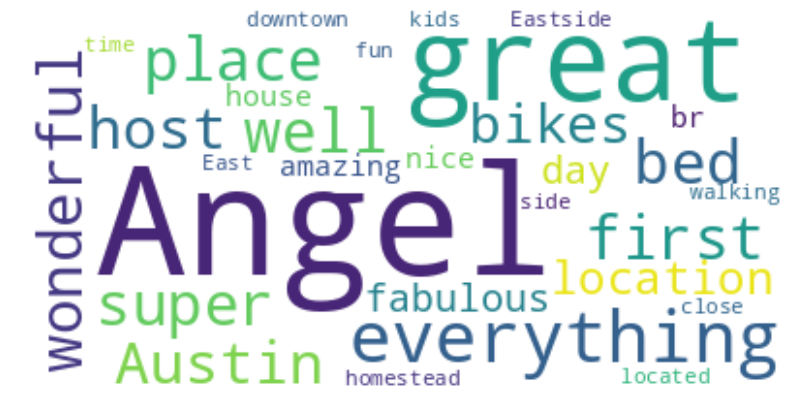

None


In [20]:
#pos words with stopwords filtered out
print(wordcloud(str(pos_reviews.comments.values), set(STOPWORDS)))

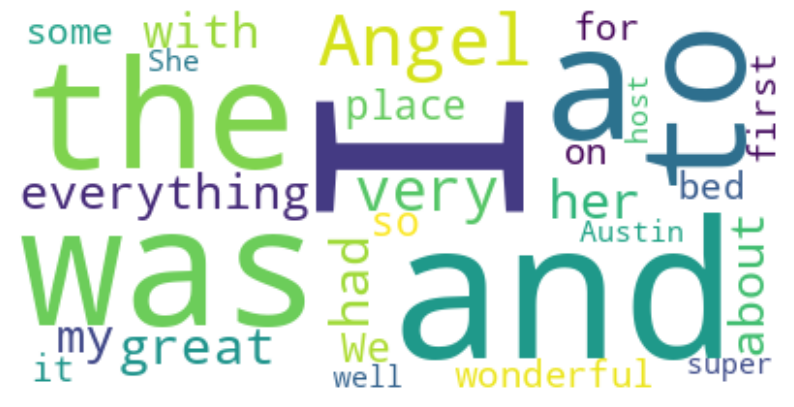

None


In [21]:
#pos words with stopwords 
print(wordcloud(str(pos_reviews.comments.values),'None'))

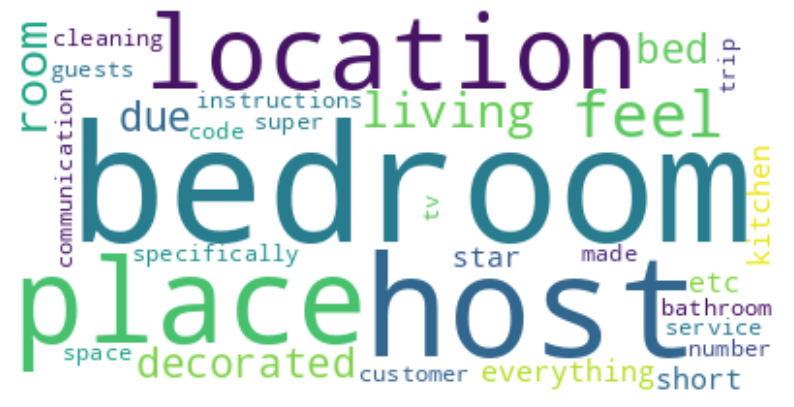

None


In [22]:
#neg words with stopwords filtered out
print(wordcloud(str(neg_reviews.comments.values), set(STOPWORDS)))

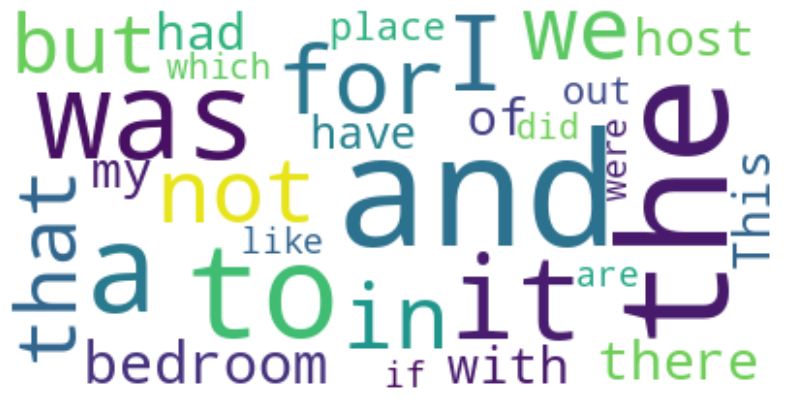

None


In [23]:
#neg words with stopwords
print(wordcloud(str(neg_reviews.comments.values), 'None'))

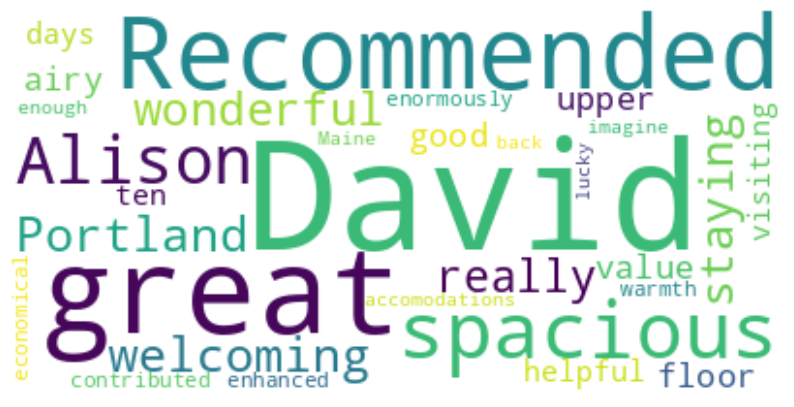

None


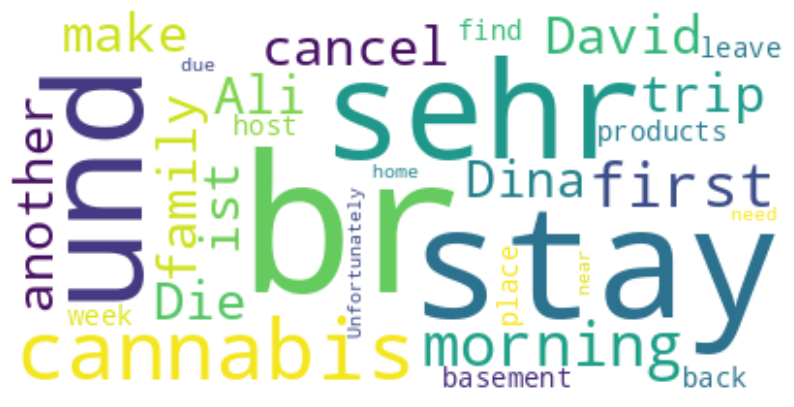

None


In [24]:
# words by cities

portland_pos = pos_reviews[pos_reviews['city_y']=='Portland']
portland_neg = neg_reviews[neg_reviews['city_y']=='Portland']

# pos_reviews portland
print(wordcloud(str(portland_pos.comments.values), set(STOPWORDS)))

#neg portland reviews
print(wordcloud(str(portland_neg.comments.values), set(STOPWORDS)))

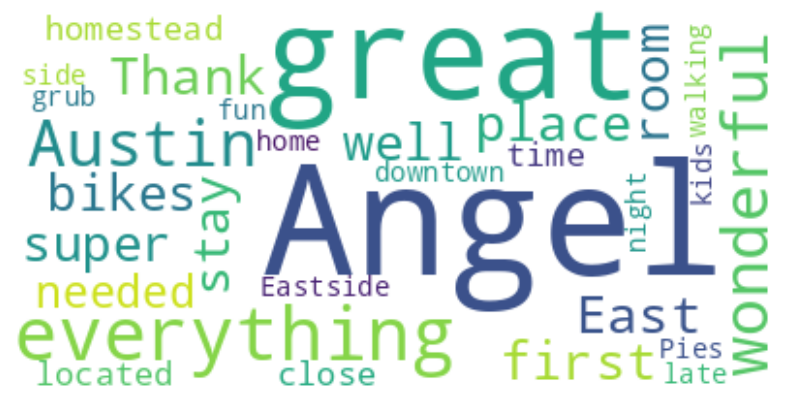

None


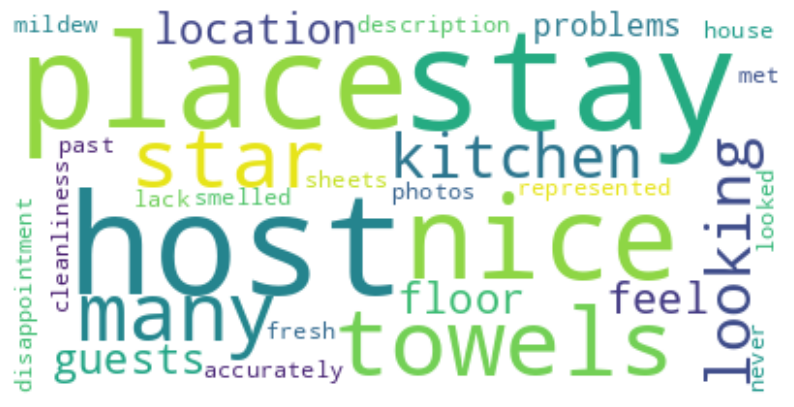

None


In [25]:
#austin reviews

austin_pos = pos_reviews[pos_reviews['city_y']=='Austin']
austin_neg = neg_reviews[neg_reviews['city_y']=='Austin']

# pos_reviews austin
print(wordcloud(str(austin_pos.comments.values), set(STOPWORDS)))

#neg reviews austin
print(wordcloud(str(austin_neg.comments.values), set(STOPWORDS)))

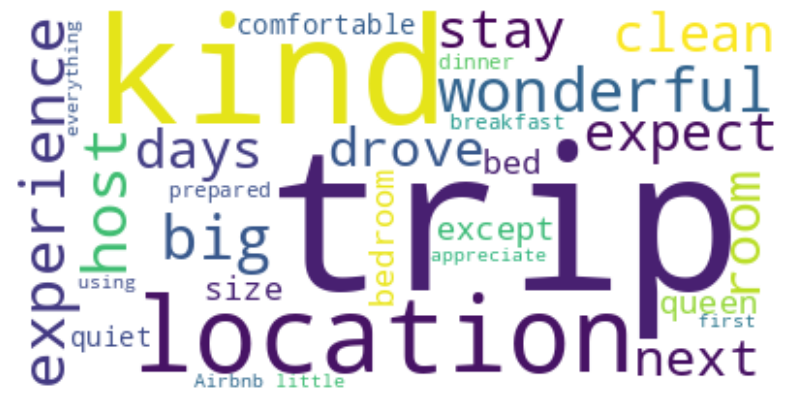

None


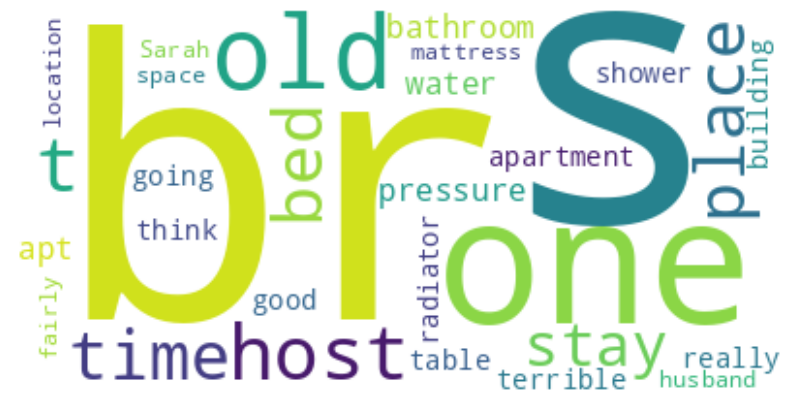

None


In [26]:
#chicago

chi_pos = pos_reviews[pos_reviews['city_y']=='Chicao']
chi_neg = neg_reviews[neg_reviews['city_y']=='Chicao']

# pos_reviews chi
print(wordcloud(str(chi_pos.comments.values), set(STOPWORDS)))

#neg chi reviews
print(wordcloud(str(chi_neg.comments.values), set(STOPWORDS)))

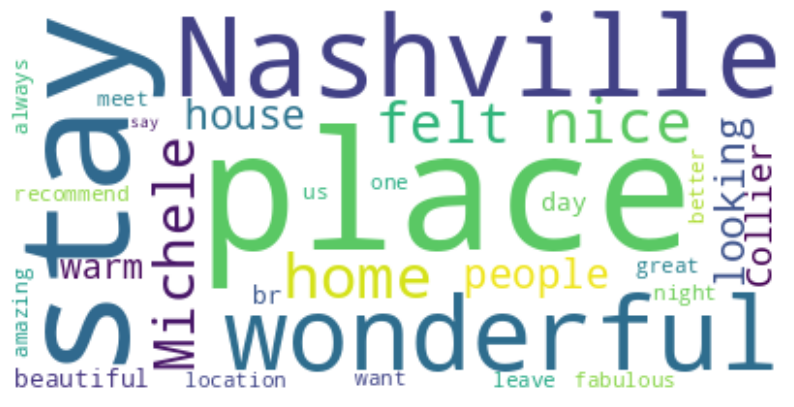

None


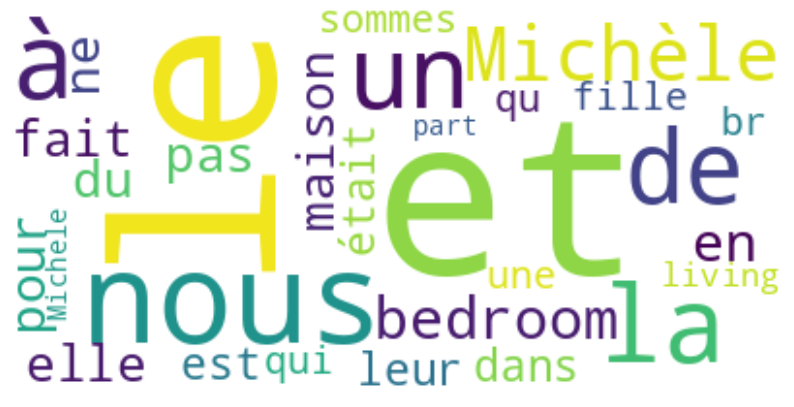

None


In [27]:
#nashville

nash_pos = pos_reviews[pos_reviews['city_y']=='Nashville']
nash_neg = neg_reviews[neg_reviews['city_y']=='Nashville']

# pos_reviews nash
print(wordcloud(str(nash_pos.comments.values), set(STOPWORDS)))

#neg nash reviews
print(wordcloud(str(nash_neg.comments.values), set(STOPWORDS)))

In [28]:
#top reviewers

reviewers = pd.DataFrame(listing_reviews.groupby(['reviewer_id'])['comments'].count()).reset_index().sort_values(by='comments',ascending=False)[:25]

top_25_ids= list(reviewers['reviewer_id'])

top_25_rev = listing_reviews[listing_reviews.reviewer_id.isin(top_25_ids)]

In [29]:
#sentiment by reviewer
num_hosts_per_reviewer = pd.DataFrame(top_25_rev.groupby(['reviewer_id','sentiment'])['comments'].count().reset_index()).sort_values(by='reviewer_id')

sent_reviewed = alt.Chart(num_hosts_per_reviewer).mark_bar().encode(
            x= alt.X('reviewer_id:N'),
            y = alt.Y('comments:Q'),
            color='sentiment:N'
)
sent_reviewed

alt.Chart(...)

In [30]:
#sent by reviewer by city
sent_city_per_reviewer = pd.DataFrame(top_25_rev.groupby(['reviewer_id','sentiment','city_y'])['comments'].count().reset_index()).sort_values(by='reviewer_id')

sent_reviewed_cities = alt.Chart(sent_city_per_reviewer).mark_bar().encode(
            x= alt.X('reviewer_id:N'),
            y = alt.Y('comments:Q'),
            color='sentiment:N',
            row=alt.Row('city_y:N', title="City")
)
sent_reviewed_cities

alt.Chart(...)

In [31]:
#Looking up comments for one reviewer
id = listing_reviews[listing_reviews['reviewer_id']==192192791]
id_reviews =id[['comments']]
id_reviews

,comments
193407,"Eileen's room is quaint, comfortable, clean an..."
224549,"Delightful, spacious, warm and secluded privat..."
224551,"I love staying at Roya's. Truly amazing, mind..."
224552,"Comfortable, quiet and private. Privacy with ..."
224554,"I stay at Roya's as a ""regular"" for the comfor..."
224556,Every experience at Roya's is exceptional. Ev...
224557,"Excellent accommodations. Great location, cle..."
224559,The most extraordinary and pleasant stay you c...
224561,Expect nothing but a wonderful little hideaway...
224562,My stays at Roya's place are like being in my ...


In [32]:
#accommodates for each city
accommodates_city = pd.DataFrame(listing_reviews.groupby(['accommodates','city_x'])['listing_id'].count().reset_index())


accommodates_per_city = alt.Chart(accommodates_city).mark_bar().encode(
        x= alt.X('accommodates:Q',title='Number of People Property Accommodates'),
        y=alt.Y('listing_id:Q',title='Number of Listings'),
        color= alt.Color('city_x:N', title='City')
        
)
accommodates_per_city

alt.Chart(...)

In [33]:
#host city
host_city = pd.DataFrame(listing_reviews.groupby(['city_x'])['host_listings_count'].mean().reset_index())
print(host_city.head())

mean_listings_by_city = alt.Chart(host_city).mark_bar().encode(
        x=alt.X('city_x:N',title='City'),
        y=alt.Y('host_listings_count:Q', title='Average number of listings'),
        color=alt.Color('city_x:N', title='City')
)

mean_listings_by_city

      city_x  host_listings_count
0     Austin            12.988902
1     Chicao            12.543275
2  Nashville            20.566392
3   Portland             4.771079


alt.Chart(...)